<a href="https://colab.research.google.com/github/engineertorikulislam/Machine-Learning-and-Data-Mining-Projects/blob/main/Data_Mining_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Md Torikul Islam
# ID: 192002131
1. Data Preprocess
2. Data Statical Analysis
3. Data Visualization
4. Linear Regression
5. Logistric Regretion
6. KNN 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
eps = np.finfo(float).eps
from numpy import log2 as log
from pprint import pprint
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [ ]:

df = pd.read_csv('diabetes.csv')



In [ ]:
# df.head().transpose()
df.head()
# df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66,29.0,0,26.6,0.351,31.0,0
2,8,183.0,64,0.0,0,23.3,0.672,32.0,1
3,1,89.0,66,23.0,94,28.1,0.167,21.0,0
4,0,137.0,40,35.0,168,43.1,2.288,33.0,1


In [ ]:
df.shape #  shape of a dataframe

(768, 9)

In [ ]:
df.describe().transpose()  # statistical analysis 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,767.0,120.921773,31.984561,0.000,99.00000,117.0000,140.50000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,767.0,20.524120,15.958959,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,767.0,33.228162,11.762615,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/768)*100})
missing_data

,total_missing,perc_missing
Pregnancies,0,0.000000
Glucose,1,0.130208
BloodPressure,0,0.000000
SkinThickness,1,0.130208
Insulin,0,0.000000
BMI,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,1,0.130208
Outcome,0,0.000000


In [ ]:
df.corr() # crr() used to find the pairwise correlation of all columns 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.130368,0.141282,-0.081074,-0.073535,0.017683,-0.033523,0.543883,0.221898
Glucose,0.130368,1.000000,0.150846,0.056464,0.330962,0.220926,0.137407,0.262848,0.468446
BloodPressure,0.141282,0.150846,1.000000,0.207383,0.088933,0.281805,0.041265,0.239269,0.065068
SkinThickness,-0.081074,0.056464,0.207383,1.000000,0.436780,0.392435,0.183840,-0.112694,0.073802
Insulin,-0.073535,0.330962,0.088933,0.436780,1.000000,0.197859,0.185071,-0.041444,0.130548
BMI,0.017683,0.220926,0.281805,0.392435,0.197859,1.000000,0.140647,0.035260,0.292695
DiabetesPedigreeFunction,-0.033523,0.137407,0.041265,0.183840,0.185071,0.140647,1.000000,0.034289,0.173844
Age,0.543883,0.262848,0.239269,-0.112694,-0.041444,0.035260,0.034289,1.000000,0.237273
Outcome,0.221898,0.468446,0.065068,0.073802,0.130548,0.292695,0.173844,0.237273,1.000000


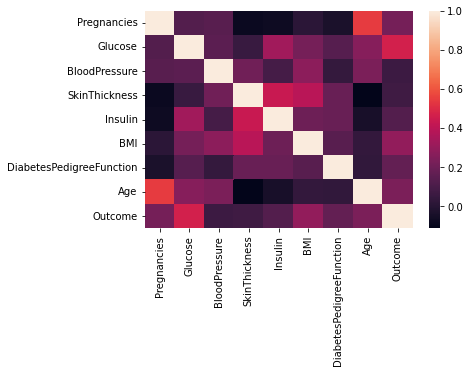

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df_d0 = df[df['Outcome'] == 0]
df_d1 = df[df['Outcome'] == 1]

df_d0_samp = df_d0.sample(268,replace = False)
df_bal = pd.concat([df_d1, df_d0_samp])

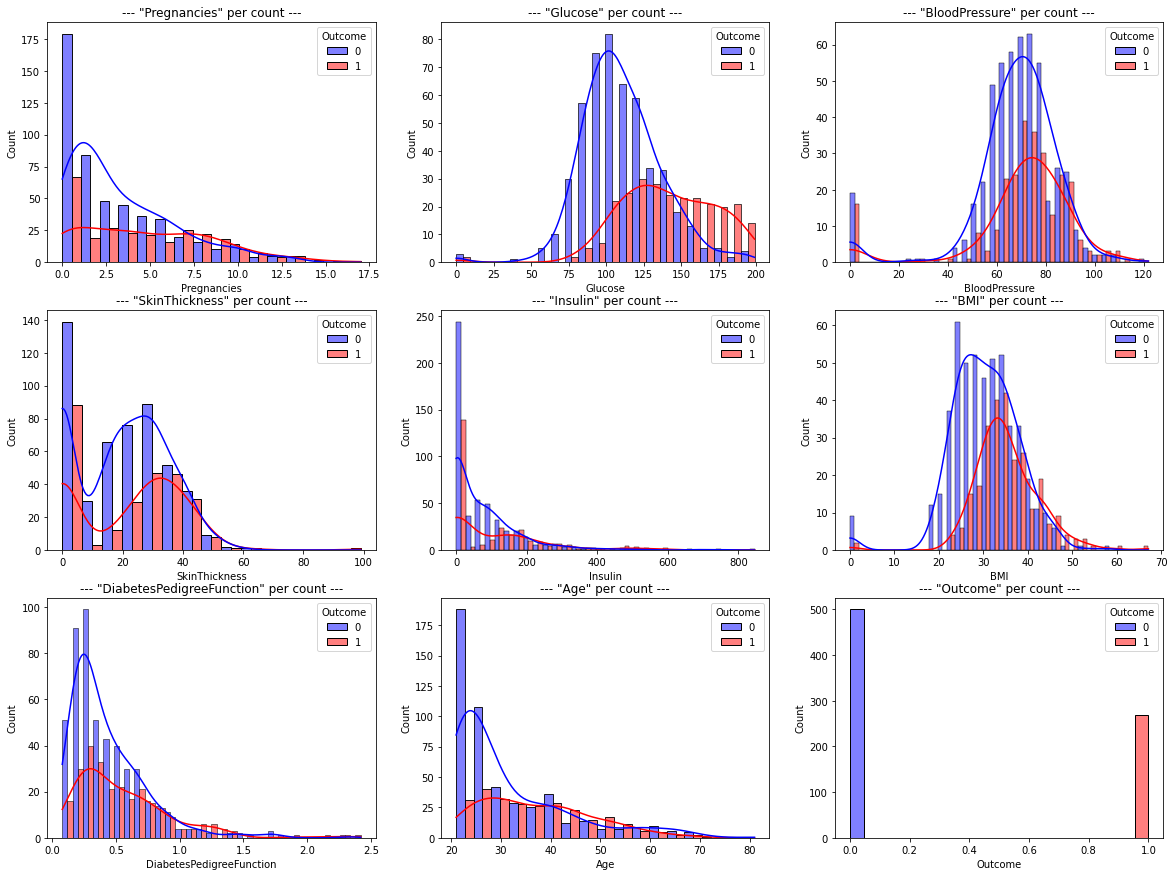

In [ ]:
def look_at_distr_hist(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.histplot(data = df, x = df[str(i)], hue = df[class_feature], multiple  = 'dodge', palette={0: 'blue', 1: 'red'}, kde=True)
            plt.title(f'--- "{i}" per count ---')
        plt.plot()
look_at_distr_hist(df_num=df_bal, class_feature="Outcome")

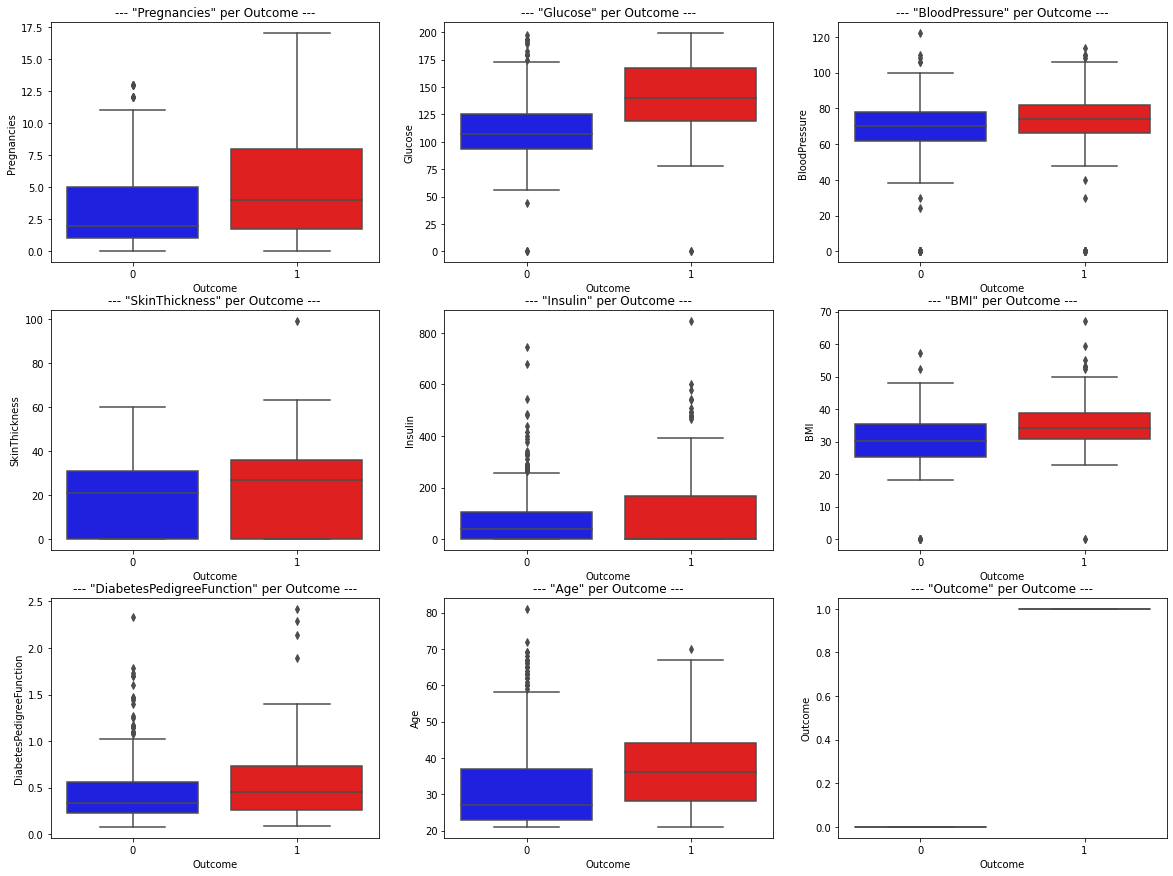

In [ ]:
def look_at_distr_box(*args, df_num=None, df_cat=None, class_feature="Outcome"):
    if df_num is not None:
        plt.figure(figsize = [20, 15])
        counter = 0
        for i in df_num.columns:
            counter += 1
            plt.subplot(3, 3, counter)
            sns.boxplot(data = df, y = df[str(i)], x = df[class_feature], dodge=True, palette={0: 'blue', 1: 'red'})
            plt.title(f'--- "{i}" per {class_feature} ---')
        plt.plot()

look_at_distr_box(df_num=df_bal, class_feature="Outcome")

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

# Data Preprocess Start

if we get any data missing vale, like null vale, we need to fill by doing median of that attibutes  

In [ ]:
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50.0,1
1,1,85.0,66,29.0,0,26.6,0.351,31.0,0
2,8,183.0,64,0.0,0,23.3,0.672,32.0,1
3,1,89.0,66,23.0,94,28.1,0.167,21.0,0
4,0,137.0,40,35.0,168,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180,32.9,0.171,63.0,0
764,2,122.0,70,27.0,0,36.8,0.340,27.0,0
765,5,121.0,72,23.0,112,26.2,0.245,30.0,0
766,1,126.0,60,0.0,0,30.1,0.349,47.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [ ]:
df['Glucose'].fillna(0)

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [ ]:
df['Glucose'].ffill()

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [ ]:
df['Age'].fillna(0)

0      50.0
1      31.0
2      32.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64

In [ ]:
df['Glucose'].ffill()

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [ ]:
df['SkinThickness'].ffill()

0      35.0
1      29.0
2       0.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766     0.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64

In [ ]:
df['Glucose'].fillna(df['Glucose'].median(), inplace = True)
df['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['Age']

0      50.0
1      31.0
2      32.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64

In [ ]:
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace= True)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# df.drop(columns=['BloodPressure', 'SkinThickness'], inplace=True)

In [ ]:
X = df.iloc[:, [5,7]].values
Y = df.iloc[:, 8].values


In [ ]:
print(Y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
print(X)

[[33.6 50. ]
 [26.6 31. ]
 [23.3 32. ]
 ...
 [26.2 30. ]
 [30.1 47. ]
 [30.4 23. ]]


# Logistic Regression

---



In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_Train,  Y_Train)

LogisticRegression(random_state=0)

In [ ]:
Y_Pred  = classifier.predict(X_Test)
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[92, 15],
       [34, 13]])

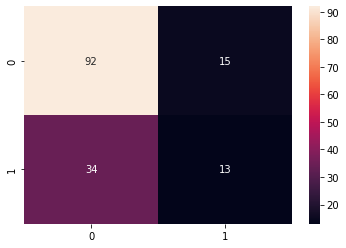

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy =accuracy_score(Y_Test, Y_Pred)
accuracy

0.6818181818181818

# **KNN**

In [ ]:
#Extracting Independent and dependent Variable  
x = df.iloc[:, [5,7]].values  
y = df.iloc[:, 8].values

In [ ]:
#Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.2, random_state=0)

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x = StandardScaler()    
x_train = st_x.fit_transform(x_train)    
x_test = st_x.transform(x_test) 

In [ ]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors = 5,
metric ='minkowski', p = 2 )  
classifier.fit(x_train,  y_train)  

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,
metric = 'minkowski',  
metric_params = None, n_jobs = None, n_neighbors = 5, p = 2,  
weights = 'uniform')  

KNeighborsClassifier()

In [ ]:
#Predicting the test set result 
y_pred = classifier.predict(x_test) 

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[88, 19],
       [26, 21]])

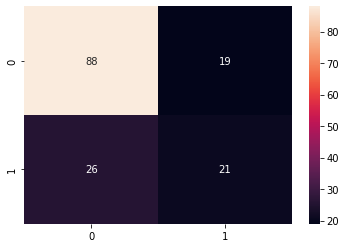

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
accuracy=classifier.score(x_test,y_test)
accuracy

0.7077922077922078

# Linear Regression

In [ ]:
x=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df['Outcome']

In [ ]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72,35.0,0,33.6,0.627,50.0
1,1,85.0,66,29.0,0,26.6,0.351,31.0
2,8,183.0,64,0.0,0,23.3,0.672,32.0
3,1,89.0,66,23.0,94,28.1,0.167,21.0
4,0,137.0,40,35.0,168,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180,32.9,0.171,63.0
764,2,122.0,70,27.0,0,36.8,0.340,27.0
765,5,121.0,72,23.0,112,26.2,0.245,30.0
766,1,126.0,60,0.0,0,30.1,0.349,47.0


In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
r= LinearRegression()
r.fit(xtrain,ytrain)
score = r.score(xtest, ytest)

In [ ]:
r.predict(xtest)

array([ 4.46746424e-01,  3.64683277e-01,  2.00863293e-01, -2.48066086e-03,
        2.65284747e-01,  3.24632091e-01,  3.91599884e-01,  1.40836420e-01,
        2.07639382e-01,  2.56134415e-01,  4.46944337e-01,  7.56933349e-02,
        1.16298433e+00,  6.53724630e-01, -7.09660463e-02,  6.53683897e-01,
        2.94163544e-01,  3.55759105e-01,  1.80528504e-01,  2.05210255e-01,
        4.22956333e-01,  1.85948967e-01,  9.93682158e-01,  3.16972019e-01,
        6.37146837e-02,  4.22365036e-01,  2.50642989e-01,  6.70089002e-01,
        8.95710480e-02,  4.80170587e-01,  4.22417836e-01,  3.71619180e-01,
        2.28943322e-02,  6.28554264e-01,  1.80385344e-01,  5.92038492e-01,
        1.07718365e-01,  2.40521209e-01,  1.18740072e-01,  5.53819048e-01,
        2.63061788e-01,  9.98106073e-02, -4.62041882e-02,  3.46833027e-01,
        6.98926528e-02, -1.26349829e-01,  6.87397548e-01,  7.46419031e-01,
        8.24276776e-02,  1.84067569e-01, -2.76919192e-01,  2.40709318e-01,
        7.76602323e-01,  

In [ ]:
score = r.score(xtest, ytest);
score

0.3466278320398666